<a href="https://colab.research.google.com/github/KOdunga/AIMLCourse/blob/main/Normalizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras import layers

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
data = pd.read_csv("/content/auto-mpg.csv", na_values='?', usecols=["Horsepower","Acceleration","MPG"])
data = data.dropna()
data.head()

,MPG,Horsepower,Acceleration
0,18.0,130.0,12.0
1,15.0,165.0,11.5
2,18.0,150.0,11.0
3,16.0,150.0,12.0
4,17.0,140.0,10.5


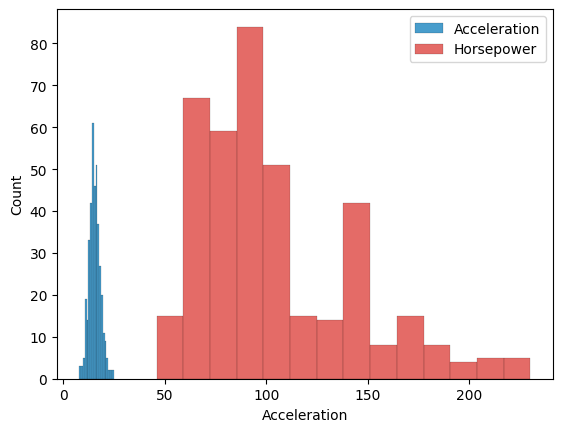

In [6]:
sns.histplot(data['Acceleration'], color='#0B7CBB', linewidth=.1, label='Acceleration')
sns.histplot(data['Horsepower'],   color='#DB3A34', linewidth=.1, label='Horsepower')
plt.legend()
plt.show()

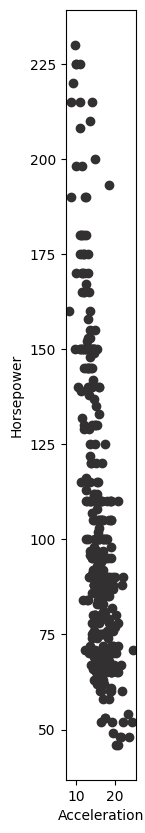

In [7]:
plt.figure(figsize=(10, 10))
plt.scatter(data['Acceleration'],data['Horsepower'], c = '#323031')
plt.xlabel('Acceleration')
plt.ylabel('Horsepower')
plt.gca().set_aspect('equal', adjustable='box')

In [9]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[["Horsepower","Acceleration"]], data['MPG'], test_size=0.3, random_state=42)

**No Normalization**

In [10]:
model1 = tf.keras.Sequential()
model1.add(InputLayer(input_shape=2))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1))

In [11]:
model1.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=0.001))

In [12]:
model1.fit(X_train, y_train,validation_split=0.2,verbose=1, epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 38ms/step - loss: 31.6329 - val_loss: 24.9400
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 17.4238 - val_loss: 15.5892
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 12.4626 - val_loss: 12.8370
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 12.4242 - val_loss: 12.1086
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 12.3750 - val_loss: 12.1120
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 11.7672 - val_loss: 12.5389
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 11.5310 - val_loss: 12.9198
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 11.3623 - val_loss: 12.7444
Epoch 9/50
7/7 [==============================] - 0s 7ms/step - loss: 11.1564 - val_loss: 12.2818
Epoch 10/50
7/7 [==============================] - 0s 10ms/step - loss: 10.9362 - val_loss: 11.9370
Epoch 11/50
7/7

In [13]:
# Accuracy (Root Mean Squared Error)
y_pred = model1.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

4/4 [==============================] - 0s 6ms/step


6.2612313389357945

**With Normalization**

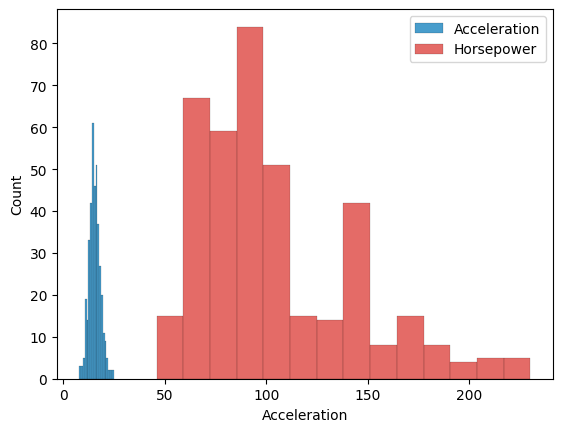

In [15]:
sns.histplot(data['Acceleration'], color='#0B7CBB', linewidth=.1, label='Acceleration')
sns.histplot(data['Horsepower'],   color='#DB3A34', linewidth=.1, label='Horsepower')
plt.legend()
plt.show()

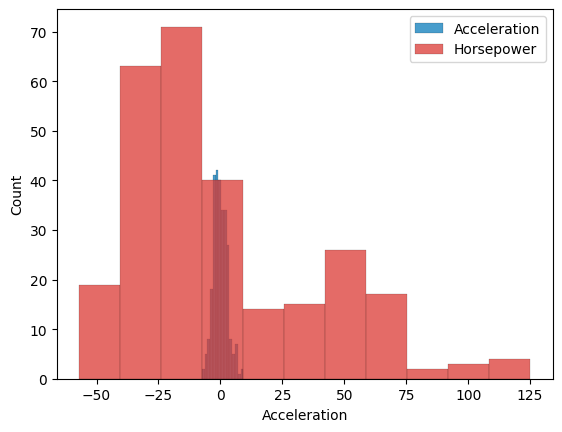

In [17]:
#Subtract the Mean
X_train['Acceleration'] = X_train['Acceleration'] - X_train['Acceleration'].mean()
X_train['Horsepower']   = X_train['Horsepower']   - X_train['Horsepower'].mean()

sns.histplot(X_train['Acceleration'], color='#0B7CBB', linewidth=.1, label='Acceleration')
sns.histplot(X_train['Horsepower'],   color='#DB3A34', linewidth=.1, label='Horsepower')
plt.legend()
plt.show()

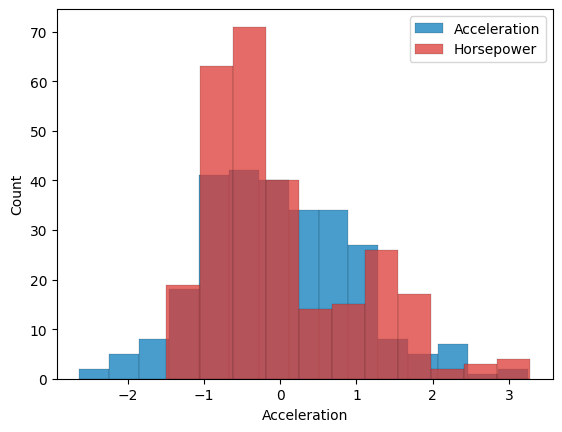

In [18]:
X_train['Acceleration'] = X_train['Acceleration']/X_train['Acceleration'].std()
X_train['Horsepower']   = X_train['Horsepower']/X_train['Horsepower'].std()

sns.histplot(X_train['Acceleration'], color='#0B7CBB', linewidth=.1, label='Acceleration')
sns.histplot(X_train['Horsepower'],   color='#DB3A34', linewidth=.1, label='Horsepower')
plt.legend()
plt.show()

In [19]:
X_train.describe().round()

,Horsepower,Acceleration
count,274.0,274.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.0,-3.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,3.0,3.0


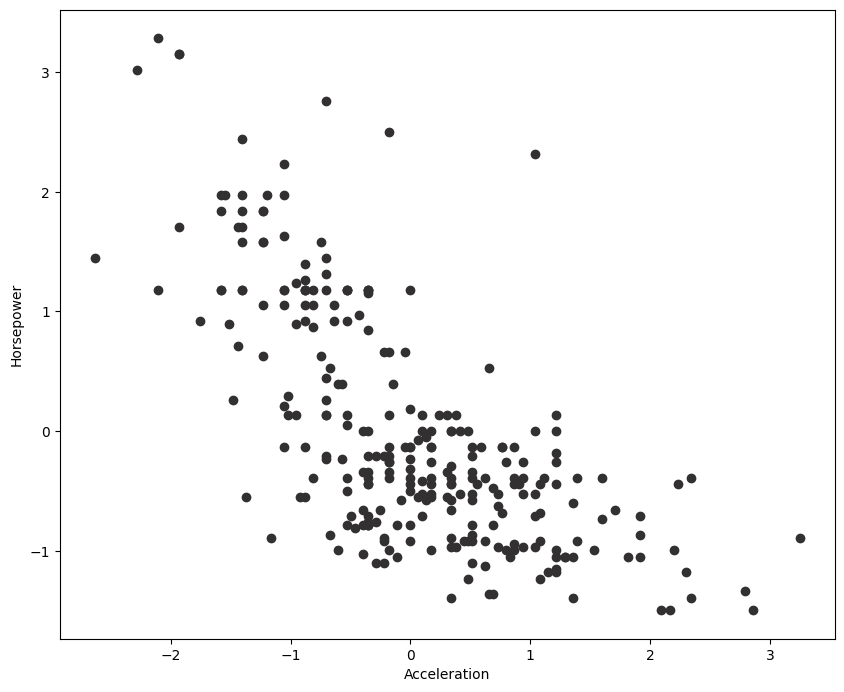

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train['Acceleration'],X_train['Horsepower'], c = '#323031')
plt.xlabel('Acceleration')
plt.ylabel('Horsepower')
plt.gca().set_aspect('equal', adjustable='box')

In [22]:
# Normalizing testing dataset
X_test['Acceleration'] = X_test['Acceleration'] - X_test['Acceleration'].mean()
X_test['Horsepower']   = X_test['Horsepower']   - X_test['Horsepower'].mean()

X_test['Acceleration'] = X_test['Acceleration']/X_test['Acceleration'].std()
X_test['Horsepower']   = X_test['Horsepower']/X_test['Horsepower'].std()

In [23]:
model2 = tf.keras.Sequential()
model2.add(InputLayer(input_shape=2))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1))

In [24]:
model2.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=0.001))

In [25]:
model2.fit(X_train, y_train,validation_split=0.2,verbose=1, epochs=50)

Epoch 1/50
7/7 [==============================] - 2s 37ms/step - loss: 23.1683 - val_loss: 25.3317
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 22.8676 - val_loss: 25.0296
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 22.5547 - val_loss: 24.6959
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 22.1964 - val_loss: 24.3133
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 21.7760 - val_loss: 23.8532
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 21.2616 - val_loss: 23.2863
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 20.6153 - val_loss: 22.5872
Epoch 8/50
7/7 [==============================] - 0s 14ms/step - loss: 19.8335 - val_loss: 21.7203
Epoch 9/50
7/7 [==============================] - 0s 13ms/step - loss: 18.8523 - val_loss: 20.6528
Epoch 10/50
7/7 [==============================] - 0s 12ms/step - loss: 17.6652 - val_loss: 19.3688
Epoch 11/50

In [26]:
# Accuracy (Root Mean Squared Error)
y_pred = model2.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

4/4 [==============================] - 0s 4ms/step


4.1804597422450875

In [28]:
! pip install scikeras[tensorflow]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found ex

In [1]:
#import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras.optimizers import Adam

#from tensorflow.keras import initializers

from sklearn.metrics import accuracy_score#confusion_matrix,
#import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
#from keras.models import Sequential
#from keras.layers import Dense
from scikeras.wrappers import KerasClassifier,KerasRegressor # for this line work first execute  pip install scikeras[tensorflow]


In [2]:
import pandas as pd
data = pd.read_csv("/content/auto-mpg.csv", na_values='?', usecols=["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model year"])
data = data.dropna()
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [3]:
data.shape

(392, 7)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('MPG', axis=1), data['MPG'], test_size=0.3, random_state=42)

In [5]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [6]:
#Z-score Normalizing
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_val = preprocessing.scale(X_val)
X_test = preprocessing.scale(X_test)

## Learning Curve

In [7]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=X_train.shape[1]))
model.add(Dense(4, activation = 'relu')) # kernel_initializer= initializers.glorot_uniform(seed=42)
model.add(Dense(2, activation = 'relu')) # 64, kernel_initializer= initializers.glorot_uniform(seed=42)
model.add(Dense(1, activation='relu'))

In [8]:
model.compile(loss="mean_absolute_error")

In [9]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val))

Epoch 1/20
9/9 [==============================] - 2s 50ms/step - loss: 23.6231 - val_loss: 22.5019
Epoch 2/20
9/9 [==============================] - 0s 24ms/step - loss: 23.6074 - val_loss: 22.4883
Epoch 3/20
9/9 [==============================] - 0s 19ms/step - loss: 23.5929 - val_loss: 22.4739
Epoch 4/20
9/9 [==============================] - 0s 19ms/step - loss: 23.5783 - val_loss: 22.4591
Epoch 5/20
9/9 [==============================] - 0s 23ms/step - loss: 23.5639 - val_loss: 22.4437
Epoch 6/20
9/9 [==============================] - 0s 16ms/step - loss: 23.5491 - val_loss: 22.4280
Epoch 7/20
9/9 [==============================] - 0s 11ms/step - loss: 23.5338 - val_loss: 22.4117
Epoch 8/20
9/9 [==============================] - 0s 8ms/step - loss: 23.5180 - val_loss: 22.3956
Epoch 9/20
9/9 [==============================] - 0s 6ms/step - loss: 23.5020 - val_loss: 22.3789
Epoch 10/20
9/9 [==============================] - 0s 6ms/step - loss: 23.4855 - val_loss: 22.3609
Epoch 11/20


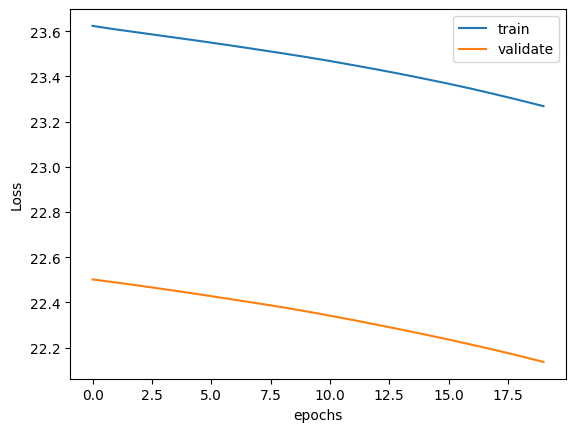

In [10]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validate')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
# Accuracy (Root Mean Squared Error)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2/2 [==============================] - 0s 12ms/step


24.235386701081524

## Hyper Parameter Tuning

In [12]:
# Function to create model, required for KerasClassifier
def create_model(learn_rate,hidden_unit1,hidden_unit2):
  # create model
  model = tf.keras.Sequential()
  model.add(InputLayer(input_shape=X_train.shape[1]))
  model.add(Dense(hidden_unit1, activation = 'relu'))
  model.add(Dense(hidden_unit1, activation = 'relu'))
  model.add(Dense(1, activation='relu'))

	# Compile model
  optimizer = Adam(learning_rate=learn_rate)
  model.compile(loss='mean_absolute_error', optimizer= optimizer, metrics=[tf.keras.metrics.MeanSquaredError()])
  return model

In [13]:
# define the grid search parameters
hidden_unit1=[4,32]
hidden_unit2=[2,16]
learn_rate = [0.001, 0.01]
hyperparameters = dict(learn_rate = learn_rate,
                       hidden_unit1=hidden_unit1,
                       hidden_unit2=hidden_unit2)

In [14]:
hyperparameters

{'learn_rate': [0.001, 0.01], 'hidden_unit1': [4, 32], 'hidden_unit2': [2, 16]}

In [15]:
# Wrap model so it can be used by scikit-learn
neural_network = KerasRegressor(model=create_model,hidden_unit1=hidden_unit1,hidden_unit2=hidden_unit2,learn_rate=learn_rate)

In [16]:
# Conduct Grid Search

# Create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters, n_jobs=-1, cv=5)

# Fit grid search
grid_result = grid.fit(X_train, y_train)

9/9 [==============================] - 1s 3ms/step - loss: 21.8670 - mean_squared_error: 552.7739


In [17]:
neural_network.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'hidden_unit1', 'hidden_unit2', 'learn_rate'])

In [18]:
# Find best model's hyperparameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("\nBest: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-9.051934 (1.536707) with: {'hidden_unit1': 4, 'hidden_unit2': 2, 'learn_rate': 0.001}
-8.872349 (1.363386) with: {'hidden_unit1': 4, 'hidden_unit2': 2, 'learn_rate': 0.01}
-9.069192 (1.418024) with: {'hidden_unit1': 4, 'hidden_unit2': 16, 'learn_rate': 0.001}
-8.444935 (1.372247) with: {'hidden_unit1': 4, 'hidden_unit2': 16, 'learn_rate': 0.01}
-9.018899 (1.582399) with: {'hidden_unit1': 32, 'hidden_unit2': 2, 'learn_rate': 0.001}
-7.971452 (1.347596) with: {'hidden_unit1': 32, 'hidden_unit2': 2, 'learn_rate': 0.01}
-8.901877 (1.474904) with: {'hidden_unit1': 32, 'hidden_unit2': 16, 'learn_rate': 0.001}
-6.740154 (0.940619) with: {'hidden_unit1': 32, 'hidden_unit2': 16, 'learn_rate': 0.01}

Best: -6.740154 using {'hidden_unit1': 32, 'hidden_unit2': 16, 'learn_rate': 0.01}


## Create Final Model

In [19]:
# create model
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=X_train.shape[1]))
model.add(Dense(grid_result.best_params_['hidden_unit1'], activation = 'relu'))
model.add(Dense(grid_result.best_params_['hidden_unit2'], activation = 'relu'))
model.add(Dense(1, activation='relu'))

# Compile model
optimizer = Adam(learning_rate=grid_result.best_params_['learn_rate'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
history = model.fit(X_train, y_train, epochs = 100, verbose = 1, validation_data=(X_val,y_val)) # batch_size = grid_result.best_params_['batch_size']

Epoch 1/100
9/9 [==============================] - 3s 96ms/step - loss: 616.8810 - mean_squared_error: 616.8810 - val_loss: 547.4583 - val_mean_squared_error: 547.4583
Epoch 2/100
9/9 [==============================] - 0s 22ms/step - loss: 610.5256 - mean_squared_error: 610.5256 - val_loss: 541.0950 - val_mean_squared_error: 541.0950
Epoch 3/100
9/9 [==============================] - 0s 39ms/step - loss: 602.6124 - mean_squared_error: 602.6124 - val_loss: 532.7651 - val_mean_squared_error: 532.7651
Epoch 4/100
9/9 [==============================] - 0s 26ms/step - loss: 592.3864 - mean_squared_error: 592.3864 - val_loss: 521.4838 - val_mean_squared_error: 521.4838
Epoch 5/100
9/9 [==============================] - 0s 35ms/step - loss: 579.0819 - mean_squared_error: 579.0819 - val_loss: 507.8989 - val_mean_squared_error: 507.8989
Epoch 6/100
9/9 [==============================] - 0s 29ms/step - loss: 563.1417 - mean_squared_error: 563.1417 - val_loss: 491.6837 - val_mean_squared_error: 4

In [20]:
# Accuracy (Root Mean Squared Error)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2/2 [==============================] - 0s 10ms/step


2.8399796077508466